In [ ]:
# importing libraries

import os
import json
import gc
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Binary Classification: Will there be revenue?
Linear Regression: How much revenue?

Loading data from Kaggle : I downloaded my API token from Kaggle (kaggle.json) and ran the following commands to be able to download the data directly from Kaggle on Google Colab

Ref : https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
! pip install kaggle

In [ ]:
#filename = os.path.join(os.getcwd(), "data", "clean_df2 - clean_df2.csv")
#df = pd.read_csv(r"C:\Users\tanus\Downloads\clean_df2 - clean_df2.csv", header=0)
#X = pd.read_csv('/content/X_top10df.csv', header=0)
#X = pd.read_csv('/content/clean_X_train.csv', error_bad_lines=False, header=0)
X = pd.read_csv('/content/clean_X_train.csv')
#y = pd.read_csv('/content/clean_y_train.csv', error_bad_lines=False, header=0)
y = pd.read_csv('/content/clean_y_train.csv')

<ipython-input-9-3da9c66a2b4d>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('/content/clean_X_train.csv')


In [ ]:
X.head(11089)

,Spend?,pageviews_max,pageviews_avg,timeOnSite_max,timeOnSite_avg,fullVisitorId,timeOnSite_min,pageviews_min,visitId_min,visitId_avg
0,0,13.0,13.0,297.000000,297.000000,20424342248747,297.000000,13.0,1480578901,1.480579e+09
1,0,1.0,1.0,250.950756,250.950756,59488412965267,250.950756,1.0,1519200377,1.519200e+09
2,0,1.0,1.0,250.950756,250.950756,118334805178127,250.950756,1.0,1507325321,1.507325e+09
3,0,25.0,25.0,1086.000000,1086.000000,174067426171406,1086.000000,25.0,1478846641,1.478847e+09
4,0,1.0,1.0,250.950756,250.950756,174453501096099,250.950756,1.0,1520448910,1.520449e+09
...,...,...,...,...,...,...,...,...,...,...
11084,0,1.0,1.0,250.950756,250.950756,510474722706173803,250.950756,1.0,1513124989,1.513125e+09
11085,0,1.0,1.0,250.950756,250.950756,510536146366713840,250.950756,1.0,1523814924,1.523815e+09
11086,0,1.0,1.0,250.950756,250.950756,510555148971517135,250.950756,1.0,1518903066,1.518903e+09
11087,0,1.0,1.0,250.950756,250.950756,510566996313123228,250.950756,1.0,1513126102,1.513126e+09


In [ ]:
y["totalTransactionRevenue"].value_counts()

0.0           217804
22990000.0        25
24990000.0        20
23990000.0        19
27990000.0        18
               ...  
49600000.0         1
26000000.0         1
11950000.0         1
13780000.0         1
95360000.0         1
Name: totalTransactionRevenue, Length: 1851, dtype: int64

# Decision Tree Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

In [ ]:
X.size

1773150

In [ ]:
X.head()

,Spend?,pageviews_max,pageviews_avg,timeOnSite_max,timeOnSite_avg,fullVisitorId,timeOnSite_min,pageviews_min,visitId_min,visitId_avg
0,0,13.0,13.0,297.000000,297.000000,20424342248747,297.000000,13.0,1480578901,1.480579e+09
1,0,1.0,1.0,250.950756,250.950756,59488412965267,250.950756,1.0,1519200377,1.519200e+09
2,0,1.0,1.0,250.950756,250.950756,118334805178127,250.950756,1.0,1507325321,1.507325e+09
3,0,25.0,25.0,1086.000000,1086.000000,174067426171406,1086.000000,25.0,1478846641,1.478847e+09
4,0,1.0,1.0,250.950756,250.950756,174453501096099,250.950756,1.0,1520448910,1.520449e+09


In [ ]:
print(X_train.shape)
print(X_test.shape)

(154261, 10)
(66113, 10)


In [ ]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth,crit='entropy'):
  '''
  Parameters:
  leaf := The minimum number of samples required to be at a leaf node
  depth := The maximum depth of the tree
  crit := The function to be used to measure the quality of a split.
  '''
  # 1. Create the DecisionTreeClassifier model object below and assign to variable 'model'
  # YOUR CODE HERE
  model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
  # 2. Fit the model to the training data below
  # YOUR CODE HERE
  model.fit(X_train, y_train)
  print(model)
  # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
  # YOUR CODE HERE
  class_label_predictions = model.predict(X_test)
  # 4. Compute the accuracy here and save the result to the variable 'acc_score'
  # YOUR CODE HERE
  acc_score = accuracy_score(y_test, class_label_predictions)

  return acc_score

In [ ]:
depth1 = 5
depth2 = 24
leaf = 100
max_depth_range = [depth1, depth2]
acc = []

In [ ]:
for md in max_depth_range:
  score = train_test_DT(X_train, X_test, y_train, y_test, 5, md)
  print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
  acc.append(float(score))

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
Max Depth=5, accuracy score: 0.9884742788861495
DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=5)
Max Depth=24, accuracy score: 0.9884289020313706


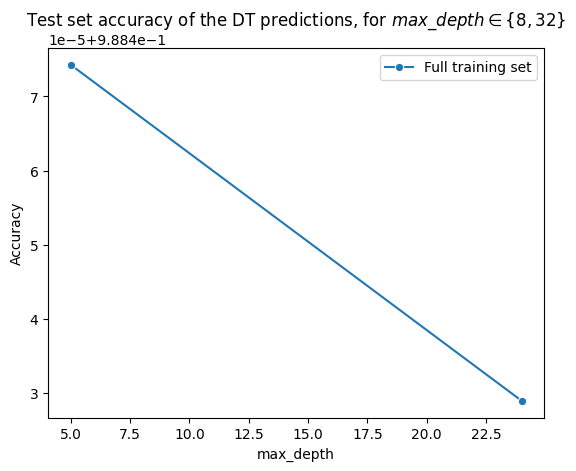

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')
plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8,32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

In [ ]:
def load_df(csv_path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

    df = pd.read_csv(csv_path,
                     converters={column: json.loads for column in JSON_COLUMNS},
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows,
                     on_bad_lines='skip')

    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df